In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib widget

import statsmodels.tools.eval_measures as bias
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
path = 'https://drive.google.com/uc?export=download&id=' 
URL  = 'https://drive.google.com/file/d/1057_dPk6rIZgXVku8kmZjq3m8WQNkJZb/view?usp=sharing'
df = pd.read_csv(path+URL.split('/')[-2],usecols=[0,1,2,3,4,5,6,7],names=['Date','SERIE1','SERIE2','SERIE3','SERIE4','SERIE5','SERIE6','SERIE7'],
                 dtype={'Date':str,'SERIE1':float,'SERIE2':float,'SERIE3':float,'SERIE4':float,'SERIE5':float,'SERIE6':float,'SERIE7':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'],format= '%d-%m-%Y %H:%M' ) #.dt.date https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html
df = df.set_index('Date')
df_5 = df.resample('5T').mean()
df_5.head()

,SERIE1,SERIE2,SERIE3,SERIE4,SERIE5,SERIE6,SERIE7
Date,,,,,,,
2010-01-01 00:00:00,5547.831152,4353.258496,4927.916309,1355.909058,1697.601026,3396.820703,920.982605
2010-01-01 00:05:00,5535.618164,4348.893457,4916.344433,1353.716626,1699.889233,3397.829590,918.181799
2010-01-01 00:10:00,5529.010351,4331.776856,4897.709473,1346.924121,1697.138647,3424.317334,916.371033
2010-01-01 00:15:00,5514.982032,4330.051758,4879.650098,1346.241382,1705.324194,3421.112500,916.161291
2010-01-01 00:20:00,5472.567285,4314.503906,4863.172266,1334.846802,1674.401562,3409.312451,914.513721


In [3]:
df_serie4 = df_5[['SERIE4']]
df_serie4

,SERIE4
Date,
2010-01-01 00:00:00,1355.909058
2010-01-01 00:05:00,1353.716626
2010-01-01 00:10:00,1346.924121
2010-01-01 00:15:00,1346.241382
2010-01-01 00:20:00,1334.846802
...,...
2011-11-28 15:30:00,1824.311914
2011-11-28 15:35:00,1832.722339
2011-11-28 15:40:00,1830.256812


In [4]:
df_serie4['index'] = range(len(df_serie4))
df_serie4

C:\Users\user\AppData\Local\Temp\ipykernel_6744\3329995441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serie4['index'] = range(len(df_serie4))


,SERIE4,index
Date,,
2010-01-01 00:00:00,1355.909058,0
2010-01-01 00:05:00,1353.716626,1
2010-01-01 00:10:00,1346.924121,2
2010-01-01 00:15:00,1346.241382,3
2010-01-01 00:20:00,1334.846802,4
...,...,...
2011-11-28 15:30:00,1824.311914,200634
2011-11-28 15:35:00,1832.722339,200635
2011-11-28 15:40:00,1830.256812,200636


In [5]:
df_LogAn = pd.read_csv('results/data/Season A/LogAn.csv', header=None)
df_LogAn.columns = ['index', 't_pred', 'y_pred', 't_sel', 't_corr']
df_LogAn.set_index('index', inplace = True)

df_LogAnMA = pd.read_csv('results/data/Season A/LogAnMA.csv', header=None)
df_LogAnMA.columns = ['index', 't_pred', 'y_pred', 't_sel', 't_corr']
df_LogAnMA.set_index('index', inplace = True)

df_LogHWA = pd.read_csv('results/data/Season A/LogHWA.csv', header=None)
df_LogHWA.columns = ['index', 't_pred', 'y_pred']
df_LogHWA.set_index('index', inplace = True)

df_LogHWM = pd.read_csv('results/data/Season A/LogHWM.csv', header=None)
df_LogHWM.columns = ['index', 't_pred', 'y_pred']
df_LogHWM.set_index('index', inplace = True)

df_LogXAn = pd.read_csv('results/data/Season A/LogXAn.csv', header=None)
df_LogXAn.columns = ['index', 't_pred', 'y_pred']
df_LogXAn['index'] = range(49247, 49247 + 26520)
df_LogXAn.set_index('index', inplace = True)

df_LogXAnMA = pd.read_csv('results/data/Season A/LogXAnMA.csv', header=None)
df_LogXAnMA.columns = ['index', 't_pred', 'y_pred']
df_LogXAnMA['index'] = range(49247, 49247 + 26520)
df_LogXAnMA.set_index('index', inplace = True)

df_LogXHWA = pd.read_csv('results/data/Season A/LogXHWA.csv', header=None)
df_LogXHWA.columns = ['index', 't_pred', 'y_pred']
df_LogXHWA['index'] = range(49247, 49247 + 26520)
df_LogXHWA.set_index('index', inplace = True)

df_LogXHWM = pd.read_csv('results/data/Season A/LogXHWM.csv', header=None)
df_LogXHWM.columns = ['index', 't_pred', 'y_pred']
df_LogXHWM['index'] = range(49247, 49247 + 26520)
df_LogXHWM.set_index('index', inplace = True)


In [6]:
df_LogAn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26496 entries, 49247 to 75742
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t_pred  26496 non-null  float64
 1   y_pred  26496 non-null  float64
 2   t_sel   26496 non-null  float64
 3   t_corr  26496 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB


In [7]:
# Persistente
df_serie4_sel = df_serie4.iloc[49247:75743]
df_serie4_per = df_serie4_sel.copy()
df_serie4_per.SERIE4 = df_serie4_sel.SERIE4.shift(periods=1, fill_value = df_serie4.iloc[49246].SERIE4)
df_serie4_per

,SERIE4,index
Date,,
2010-06-20 23:55:00,2828.313135,49247
2010-06-21 00:00:00,2828.664111,49248
2010-06-21 00:05:00,2830.813281,49249
2010-06-21 00:10:00,2827.722998,49250
2010-06-21 00:15:00,2829.968164,49251
...,...,...
2010-09-20 23:30:00,3043.223877,75738
2010-09-20 23:35:00,3040.164892,75739
2010-09-20 23:40:00,3033.962793,75740


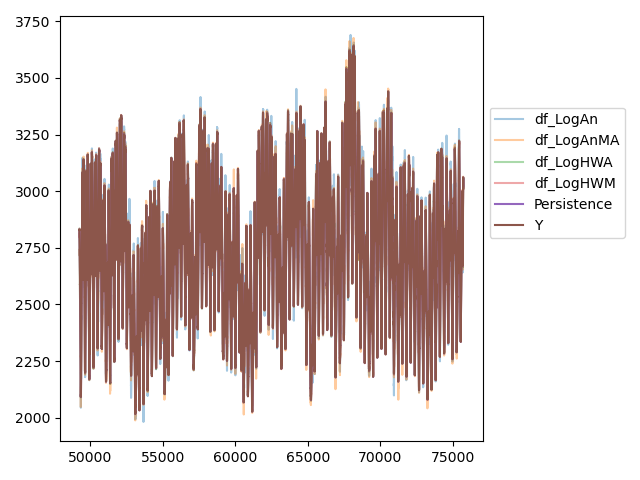

In [8]:
plt.figure()
plt.plot(df_LogAn.y_pred, label='df_LogAn', alpha = 0.4)
plt.plot(df_LogAnMA.y_pred, label='df_LogAnMA', alpha = 0.4)
plt.plot(df_LogHWA.y_pred, label='df_LogHWA', alpha = 0.4)
plt.plot(df_LogHWM.y_pred, label='df_LogHWM', alpha = 0.4)

plt.plot(df_serie4_per['index'], df_serie4_per.SERIE4, label='Persistence')

plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

plt.legend(bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()

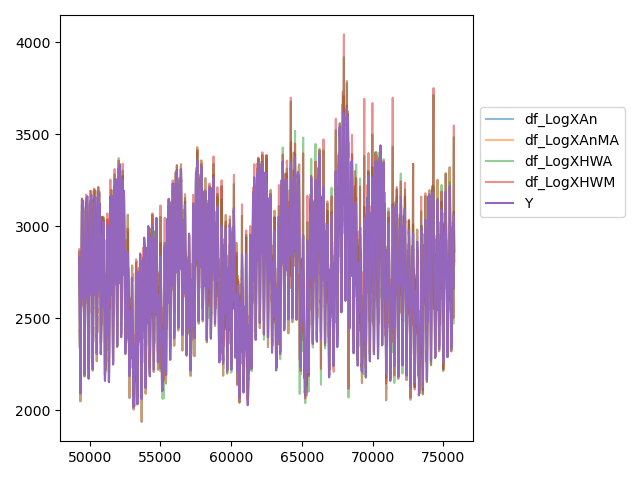

In [9]:
plt.figure()
plt.plot(df_LogXAn.y_pred, label='df_LogXAn', alpha = 0.5)
plt.plot(df_LogXAnMA.y_pred, label='df_LogXAnMA', alpha = 0.5)
plt.plot(df_LogXHWA.y_pred, label='df_LogXHWA', alpha = 0.5)
plt.plot(df_LogXHWM.y_pred, label='df_LogXHWM', alpha = 0.5)

plt.plot(df_serie4_sel['index'], df_serie4_sel.SERIE4, label='Y')

plt.legend(bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()

In [10]:
a_methods = [
    df_LogAn,
    df_LogAnMA,
    df_LogHWA,
    df_LogHWM
]

d_maes = []
for m in a_methods:
    mae_p = mean_absolute_error(m.y_pred,df_serie4_sel.SERIE4)
    mape_p = mean_absolute_percentage_error(m.y_pred,df_serie4_sel.SERIE4)
    d_maes.append({
        'mae' : mae_p,
        'mape' : mape_p
    })
df_maes = pd.DataFrame(d_maes)
df_maes['method'] = [
    'df_LogAn',
    'df_LogAnMA',
    'df_LogHWA',
    'df_LogHWM',
]
df_maes

,mae,mape,method
0,32.437027,0.011929,df_LogAn
1,8.187475,0.003027,df_LogAnMA
2,9.911906,0.003637,df_LogHWA
3,9.822454,0.003604,df_LogHWM


In [11]:
df_serie4x_sel = df_serie4.iloc[49247:75767]
a_methods = [
    df_LogXAn,
    df_LogXAnMA,
    df_LogXHWA,
    df_LogXHWM
]

d_xmaes = []
for m in a_methods:
    mae_p = mean_absolute_error(m.y_pred,df_serie4x_sel.SERIE4)
    mape_p = mean_absolute_percentage_error(m.y_pred,df_serie4x_sel.SERIE4)
    d_xmaes.append({
        'mae' : mae_p,
        'mape' : mape_p
    })
df_xmaes = pd.DataFrame(d_xmaes)
df_xmaes['method'] = [
    'LogXAn',
    'LogXAnMA',
    'LogXHWA',
    'LogXHWM',
]
df_xmaes

,mae,mape,method
0,48.623465,0.017839,LogXAn
1,48.623465,0.017839,LogXAnMA
2,37.709870,0.013732,LogXHWA
3,39.698546,0.014297,LogXHWM


In [12]:
df_maes_def = pd.concat([df_maes, df_xmaes])

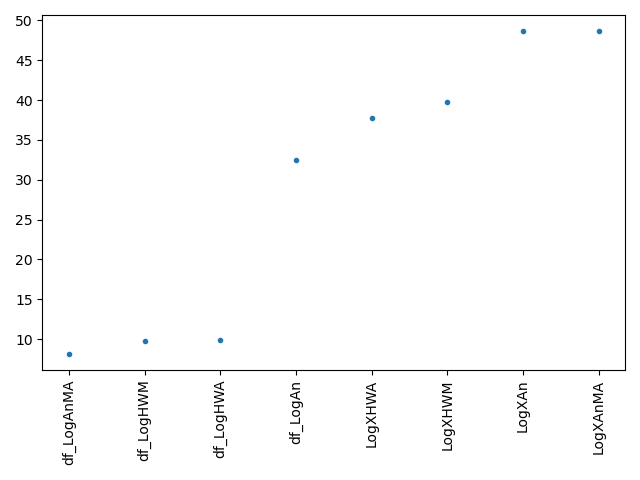

In [13]:
df_maes_def.sort_values('mae', inplace = True)
plt.figure()
plt.plot(df_maes_def.method, df_maes_def.mae, '.')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [14]:
a_methods = [
    df_LogAn,
    df_LogAnMA,
    df_LogHWA,
    df_LogHWM
]

d_errors = []
for m in a_methods:
    ts_e = df_serie4_sel.reset_index().SERIE4 - m.reset_index().y_pred
    d_errors.append(pd.Series(ts_e))
df_errors = pd.DataFrame(d_errors)

df_errors = df_errors.T
df_errors.columns = [
    'LogAn',
    'LogAnMA',
    'LogHWA',
    'LogHWM'
]
df_errors

,LogAn,LogAnMA,LogHWA,LogHWM
0,27.244910,27.244910,6.863250,6.258107
1,22.749623,22.749623,-3.317085,-3.481555
2,13.752328,13.752328,-3.337989,-2.742572
3,15.247765,15.247765,-4.994578,-4.560912
4,18.387118,18.387118,-2.605767,-2.796537
...,...,...,...,...
26491,-8.581477,3.147399,1.044345,1.434484
26492,-12.083808,-1.713254,-3.639333,-3.931859
26493,-12.846789,0.113129,-6.567943,-8.302926
26494,-8.762210,6.609419,-10.501155,-9.178245


In [15]:
df_serie4x_sel = df_serie4.iloc[49247:75767]
a_methods = [
    df_LogXAn,
    df_LogXAnMA,
    df_LogXHWA,
    df_LogXHWM
]

d_xerrors = []
for m in a_methods:
    ts_e = df_serie4x_sel.reset_index().SERIE4 - m.reset_index().y_pred
    d_xerrors.append(pd.Series(ts_e))
df_xerrors = pd.DataFrame(d_xerrors)

df_xerrors = df_xerrors.T
df_xerrors.columns = [
    'LogXAn',
    'LogXAnMA',
    'LogXHWA',
    'LogXHWM'
]
df_xerrors

,LogXAn,LogXAnMA,LogXHWA,LogXHWM
0,27.244910,27.244910,6.863250,6.258107
1,23.826402,23.826402,3.812146,3.419191
2,15.604506,15.604506,-1.497518,-1.637755
3,17.576944,17.576944,-3.223619,-4.341923
4,21.332298,21.332298,-8.440354,-11.451938
...,...,...,...,...
26515,-91.592492,-91.592492,-38.943204,-21.365222
26516,-81.796760,-81.796760,-35.204576,-15.959001
26517,-84.477004,-84.477004,-37.731260,-16.879391
26518,-88.881168,-88.881168,-40.859540,-18.630979


In [16]:
df_errors_def = pd.concat([df_errors, df_xerrors], axis=1)
df_errors_def

,LogAn,LogAnMA,LogHWA,LogHWM,LogXAn,LogXAnMA,LogXHWA,LogXHWM
0,27.244910,27.244910,6.863250,6.258107,27.244910,27.244910,6.863250,6.258107
1,22.749623,22.749623,-3.317085,-3.481555,23.826402,23.826402,3.812146,3.419191
2,13.752328,13.752328,-3.337989,-2.742572,15.604506,15.604506,-1.497518,-1.637755
3,15.247765,15.247765,-4.994578,-4.560912,17.576944,17.576944,-3.223619,-4.341923
4,18.387118,18.387118,-2.605767,-2.796537,21.332298,21.332298,-8.440354,-11.451938
...,...,...,...,...,...,...,...,...
26515,NaN,NaN,NaN,NaN,-91.592492,-91.592492,-38.943204,-21.365222
26516,NaN,NaN,NaN,NaN,-81.796760,-81.796760,-35.204576,-15.959001
26517,NaN,NaN,NaN,NaN,-84.477004,-84.477004,-37.731260,-16.879391
26518,NaN,NaN,NaN,NaN,-88.881168,-88.881168,-40.859540,-18.630979


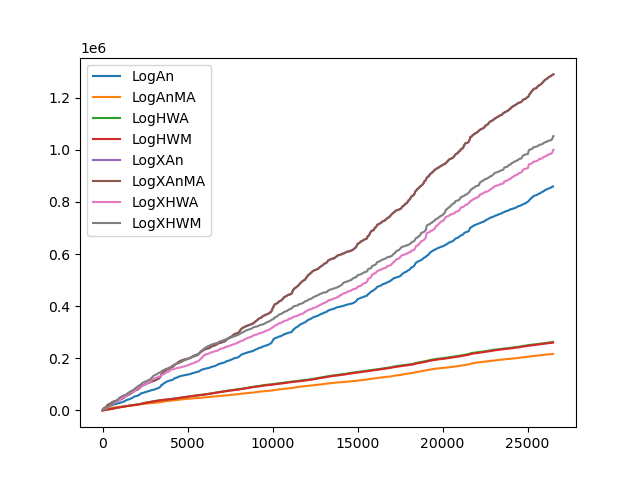

In [22]:
plt.figure()
plt.plot(df_errors_def.LogAn.abs().cumsum(), label = 'LogAn')
plt.plot(df_errors_def.LogAnMA.abs().cumsum(), label = 'LogAnMA')
plt.plot(df_errors_def.LogHWA.abs().cumsum(), label = 'LogHWA')
plt.plot(df_errors_def.LogHWM.abs().cumsum(), label = 'LogHWM')
plt.plot(df_errors_def.LogXAn.abs().cumsum(), label = 'LogXAn')
plt.plot(df_errors_def.LogXAnMA.abs().cumsum(), label = 'LogXAnMA')
plt.plot(df_errors_def.LogXHWA.abs().cumsum(), label = 'LogXHWA')
plt.plot(df_errors_def.LogXHWM.abs().cumsum(), label = 'LogXHWM')
plt.legend()
plt.show()

In [37]:
df_errors_samp = df_errors_def.sample(frac=0.10)
# https://stackoverflow.com/a/46134162
df_errors_melt = df_errors_samp.melt(var_name='models', value_name='vals')
df_errors_melt

,models,vals
0,LogAn,-77.155495
1,LogAn,26.031059
2,LogAn,-25.749059
3,LogAn,-30.530827
4,LogAn,-63.576608
...,...,...
21211,LogXHWM,18.269591
21212,LogXHWM,8.066843
21213,LogXHWM,-26.525298
21214,LogXHWM,15.251427


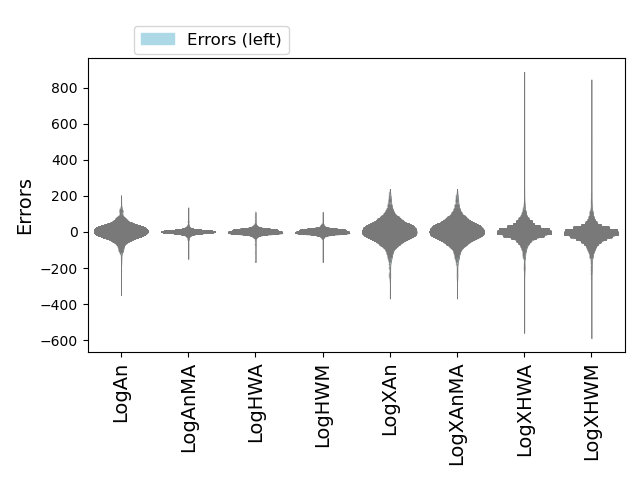

In [39]:
# [ ] Gráfica a partir de muestreo de datos
# [ ] Línea de tiempos
# [ ] Ordenar por menor MAE
plt.figure()
sns.violinplot(x="models", y="vals", data=df_errors_melt, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('Errors', fontsize = 14)
plt.xlabel('')
patch = mpatches.Patch(color='lightblue', label='Errors (left)')
#plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
# Simple arrow
#plt.annotate('Selected \n method', xy=(1.02, 40000000), fontsize=12, horizontalalignment='center', rotation = 90)
plt.legend(handles=[patch], bbox_to_anchor = (0.39, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()